In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# input data Directory
dir = '/content/drive/My Drive'

In [4]:
# Question 1

# input data file
x_train_dataset_file = 'x_train.npy'
y_train_dataset_file = 'y_train.npy'

x_test_dataset_file = 'x_test.npy'
y_test_dataset_file = 'y_test.npy'

x_train_dataset = np.load(dir + "/" + x_train_dataset_file)
y_train_dataset = np.load(dir + "/" + y_train_dataset_file)

x_test_dataset = np.load(dir + "/" + x_test_dataset_file)
y_test_dataset = np.load(dir + "/" + y_test_dataset_file)

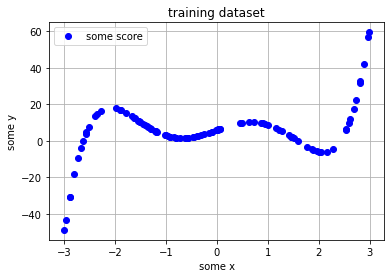

In [5]:
plt.plot(x_train_dataset,y_train_dataset,'bo')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('training dataset')
plt.grid()
plt.show()

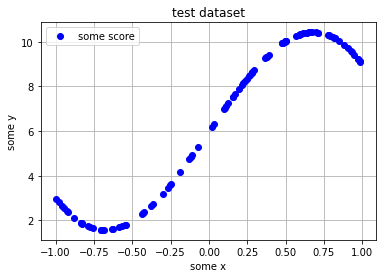

In [6]:
plt.plot(x_test_dataset, y_test_dataset,'bo')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('test dataset')
plt.grid()
plt.show()

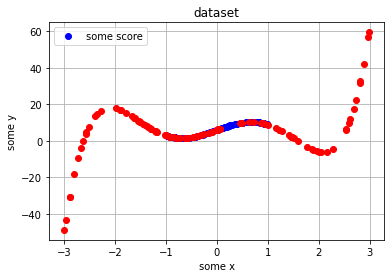

In [7]:
plt.plot(x_test_dataset, y_test_dataset,'bo')
plt.plot(x_train_dataset,y_train_dataset,'ro')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('dataset')
plt.grid()
plt.show()

Average Least Square Error: 
26.770640310951002


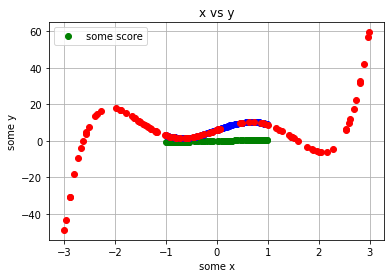

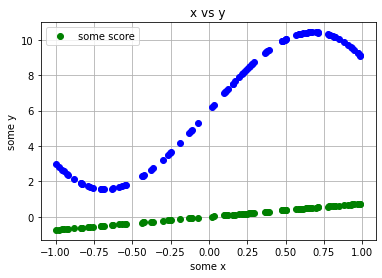

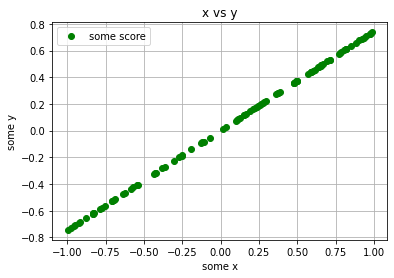

In [8]:
# step 2: write a function h : X -> Y,  h(x) is called the hypothesis
# h(x) = sum i=0 to n (𝜃[i] * x[i]) = 𝜃^T * x
theta = np.zeros([100,1])
learning_rate = 0.0000001
epoch = 10000
J_cost_func_list = np.zeros([epoch, 1])
# learning: Given this formulation, we will need to identify a way to find the values of 𝜃
# We will need to use the training data to learn these
# parameters. This process is called learning
# cost function or objective function
# ordinary least squares regression model
def hypothesis_function(theta, x):
  y = np.transpose(theta) @ x
  return y

def cost_function(x, y, theta):
  j = 1 / 2 * np.sum(np.power(hypothesis_function(theta, x) - y, 2))
  return j

def LMS_function(x, y, theta, learning_rate, epoch):
  N,k = x.shape
  for i in range(epoch):
    theta = theta + learning_rate * np.sum((y.reshape((N,1)) - hypothesis_function(theta, x)) * x)
    J_cost_func_list[i] = cost_function(x, y, theta)
  return theta

final_theta = LMS_function(x_train_dataset, y_train_dataset, theta, learning_rate, epoch)

final_y = final_theta * x_test_dataset

lse = 0.5 * np.sum(np.power(y_test_dataset - final_y, 2))
alse = lse / 100
print("Average Least Square Error: ")
print(alse)

# print(J_cost_func_list)

plt.plot(x_test_dataset, final_y,'go')
plt.plot(x_test_dataset, y_test_dataset,'bo')
plt.plot(x_train_dataset,y_train_dataset,'ro')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('x vs y')
plt.grid()
plt.show()

plt.plot(x_test_dataset, final_y,'go')
plt.plot(x_test_dataset, y_test_dataset,'bo')
# plt.plot(x_train_dataset,y_train_dataset,'ro')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('x vs y')
plt.grid()
plt.show()

plt.plot(x_test_dataset, final_y,'go')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('x vs y')
plt.grid()
plt.show()

2
        2
0.3717 x + 2.842 x + 0.2697
Average Least Square Error: 
19.947178048757394
[[11640.38378601]
 [11639.7591319 ]
 [11639.13461869]
 ...
 [10356.37145887]
 [10356.1251667 ]
 [10355.87898697]]


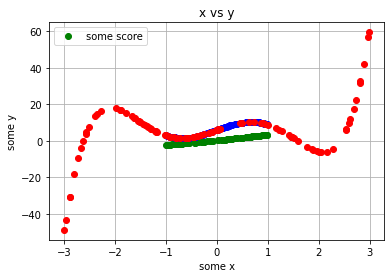

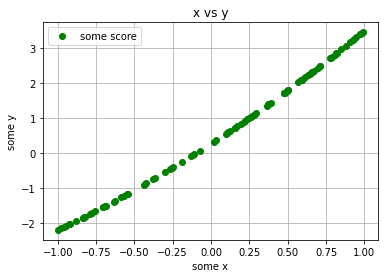

3
       3        2
0.287 x + 2.85 x + 1.574 x + 0.2748
Average Least Square Error: 
17.04870177337257
[[11639.84933814]
 [11638.69074661]
 [11637.53280615]
 ...
 [10110.01993188]
 [10109.91597415]
 [10109.81217094]]


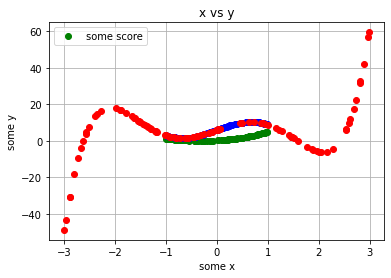

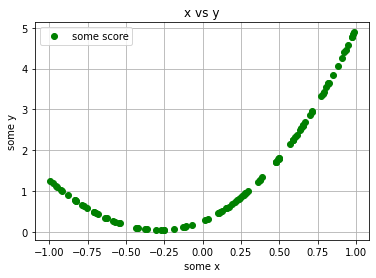

4
         4         3         2
-0.6848 x + 2.947 x - 3.878 x + 26.38 x + 0.333
Average Least Square Error: 
111.96930521307944
[[11634.99917677]
 [11629.00238381]
 [11623.01819562]
 ...
 [28409.60579391]
 [28421.47613673]
 [28433.34814517]]


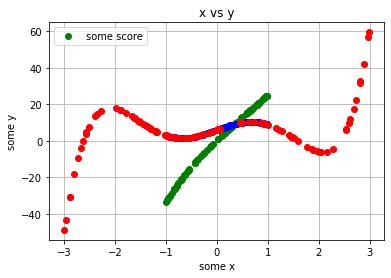

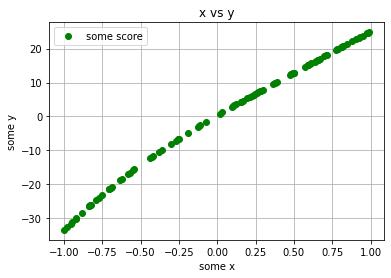

5
        5         4         3         2
-0.353 x + 2.914 x - 2.017 x + 26.27 x - 14.06 x + 0.3131
Average Least Square Error: 
123.56234801542873
[[11631.43245416]
 [11621.89812908]
 [11612.4054741 ]
 ...
 [12630.96601   ]
 [12631.20329961]
 [12631.44028825]]


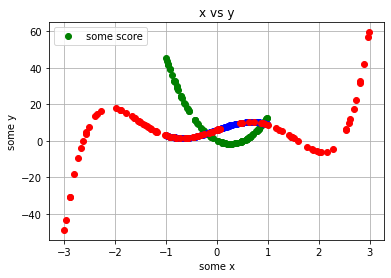

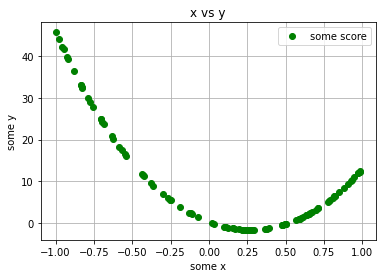

In [11]:
theta_poly = np.zeros([100,1])
round = 5
learning_rate_poly = 0.0000001
epoch = 3000
J_cost_func_poly_list = np.zeros([epoch, 1])

def poly2(degree, x):
    r, c = x.shape
    p = np.ones((r, degree * c + 1))
    for i in range(r):
        for j in range(degree):
            p[i, j * c:(j + 1) * c] = x[i, :] ** (j + 1)
    return p

def hypothesis_function_poly(theta, x, degree):
  y = np.transpose(theta) @ poly2(degree, x)
  split_poly = np.hsplit(y, degree+1)
  temp_col = split_poly[0]
  for i in range(1, degree):
    temp_col = temp_col + split_poly[i]
  # print(np.shape(temp_col))
  return temp_col

def cost_function_poly(x, y, theta, degree):
  j = 1 / 2 * np.sum(np.power(hypothesis_function_poly(theta, x, degree) - y, 2))
  return j

def LMS_function_poly(x, y, theta, learning_rate, epoch, degree):
  for i in range(epoch):
    theta = theta + learning_rate * ((y.reshape((100,1)) - hypothesis_function_poly(theta, x, degree)) * x)
    J_cost_func_poly_list[i] = cost_function_poly(x, y, theta, degree)
  return theta

for iter in range(2, round+1):
  print(iter)
  final_theta = LMS_function_poly(x_train_dataset, y_train_dataset, theta_poly, learning_rate_poly, epoch, iter)
  y = np.transpose(final_theta) @ poly2(iter, x_train_dataset)
  # poly = np.poly1d(np.flip(y)[0])
  poly = np.poly1d(y[0])
  
  print(poly)
  final_y = poly(x_test_dataset)

  lse = 0.5 * np.sum(np.power(y_test_dataset - final_y, 2))
  alse = lse / 100
  print("Average Least Square Error: ")
  print(alse)

  print(J_cost_func_poly_list)

  plt.plot(x_test_dataset, final_y,'go')
  plt.plot(x_test_dataset, y_test_dataset,'bo')
  plt.plot(x_train_dataset,y_train_dataset,'ro')
  plt.ylabel('some y')
  plt.xlabel('some x')
  plt.legend(['some score'])
  plt.title('x vs y')
  plt.grid()
  plt.show()

  plt.plot(x_test_dataset, final_y,'go')
  plt.ylabel('some y')
  plt.xlabel('some x')
  plt.legend(['some score'])
  plt.title('x vs y')
  plt.grid()
  plt.show()

# learning_rate_poly = 0.000001
# epoch = 3000

Average Least Square Error: 
86.10181462699347
[[11631.43245416]
 [11621.89812908]
 [11612.4054741 ]
 ...
 [12630.96601   ]
 [12631.20329961]
 [12631.44028825]]


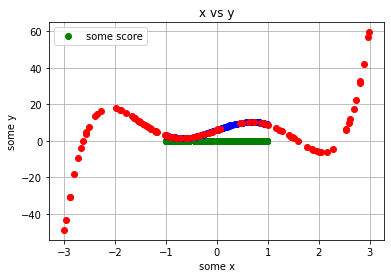

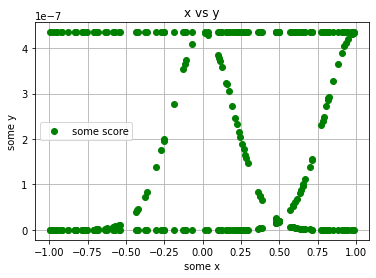

In [12]:
theta_gauss = np.zeros([100,1])
learning_rate_gauss = 0.000000000001
epoch = 500
J_cost_func_gauss_list = np.zeros([epoch, 1])

def gauss(inter, x):
    r, c = x.shape
    p = np.ones((r, inter * c + 1))
    for i in range(r):
        for j in range(inter):
            p[i , j * c:(j + 1) * c] = np.exp(-(x[i, :] - j/(inter - 1)) ** 2 / (2 * 0.2 ** 2))
    return p

def hypothesis_function_gauss(theta, x, degree):
  y = np.transpose(theta) @ gauss(degree, x)
  split_poly = np.hsplit(y, degree+1)
  temp_col = split_poly[0]
  for i in range(1, degree):
    temp_col = temp_col + split_poly[i]
  return temp_col

def cost_function_gauss(x, y, theta, degree):
  j = 1 / 2 * np.sum(np.power(hypothesis_function_gauss(theta, x, degree) - y, 2))
  return j

def LMS_function_gauss(x, y, theta, learning_rate, epoch, degree):
  for i in range(epoch):
    theta = theta + learning_rate * np.sum((y.reshape((100,1)) - hypothesis_function_gauss(theta, x, degree)) * x)
    J_cost_func_gauss_list[i] = cost_function_gauss(x, y, theta, degree)
  return theta

final_theta = LMS_function_gauss(x_train_dataset, y_train_dataset, theta_gauss, learning_rate_gauss, epoch, 7)
# print(final_theta)
final_y = final_theta * gauss(2, x_test_dataset)

lse = 0.5 * np.sum(np.power(y_test_dataset - final_y, 2))
alse = lse / 100
print("Average Least Square Error: ")
print(alse)

print(J_cost_func_poly_list)

plt.plot(x_test_dataset, final_y,'go')
plt.plot(x_test_dataset, y_test_dataset,'bo')
plt.plot(x_train_dataset,y_train_dataset,'ro')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('x vs y')
plt.grid()
plt.show()

plt.plot(x_test_dataset, final_y,'go')
plt.ylabel('some y')
plt.xlabel('some x')
plt.legend(['some score'])
plt.title('x vs y')
plt.grid()
plt.show()

In [13]:
# Question 2

import pandas as pd

input_data2 = 'Assignment1_Q2_Data.csv'

data = pd.read_csv(dir + "/" + input_data2)
data = np.transpose(data.values)

local_price = np.reshape(data[1,:],(28,1))
bathrooms = np.reshape(data[2,:],(28,1))
land_area = np.reshape(data[3,:],(28,1))
living_area = np.reshape(data[4,:],(28,1))
garages = np.reshape(data[5,:],(28,1))
rooms = np.reshape(data[6,:],(28,1))
bedrooms = np.reshape(data[7,:],(28,1))
age_of_home = np.reshape(data[8,:],(28,1))
construction_type = np.reshape(data[9,:],(28,1))
architecture_type = np.reshape(data[10,:],(28,1))
fire_places = np.reshape(data[11,:],(28,1))
price = np.reshape(data[12,:],(28,1))
feature = np.hstack((local_price, bathrooms, land_area, living_area, garages, rooms, bedrooms, age_of_home, construction_type, architecture_type, fire_places))
feature_t = np.transpose(feature)

inv = np.linalg.inv(feature_t @ feature)
theta2 = inv @ feature_t @ price
print("Features: ")
print(theta2)
h = feature @ theta2
lse = 0.5 * np.sum(np.power(y_test_dataset - final_y, 2))
alse = lse / 28
print("Average Least Square Error: ")
print(alse)

Features: 
[[ 0.78476424]
 [10.38692747]
 [ 0.22634789]
 [12.46564715]
 [ 1.81521629]
 [-0.86999651]
 [-0.25879357]
 [-0.05848319]
 [ 1.02605806]
 [ 1.79247025]
 [ 2.68075214]]
Average Least Square Error: 
307.50648081069096


In [14]:
# Question 3
# Locally Weighted Linear Regression
t = 0.5
y = np.zeros((100,1))

for i in range(100):
    w = np.diag(np.exp(-((x_train_dataset - x_train_dataset[i, :])[:, 0] ** 2) / (2 * t ** 2)))
    tw = np.linalg.pinv(np.transpose(x_train_dataset) @ w @ x_train_dataset) @ np.transpose(x_train_dataset) @ w @ y_train_dataset
    y[i] = np.dot(x_train_dataset[i],tw)

print("Theta: ")
print(tw)
lselw = 0.5 * np.sum((y_train_dataset - y) ** 2)
alse = lselw / 100
print("Average Least Square Error: ")
print(alse)

Theta: 
[-4.29278822]
Average Least Square Error: 
13744.03551462213
